In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from scipy.ndimage import gaussian_filter
from PIL import Image

# Define the xy input coordinates
xyinput = np.array([
    [1, 31], [13, 31], [23, 31], [1, 95], [1, 159], [0, 272], [22, 272]
])


In [43]:
# Convert xy input to nm (assuming the explanation for constants provided in the document)
xynm = np.array([[xy[0] * 2.75 + 10, xy[1] * 0.34] for xy in xyinput])

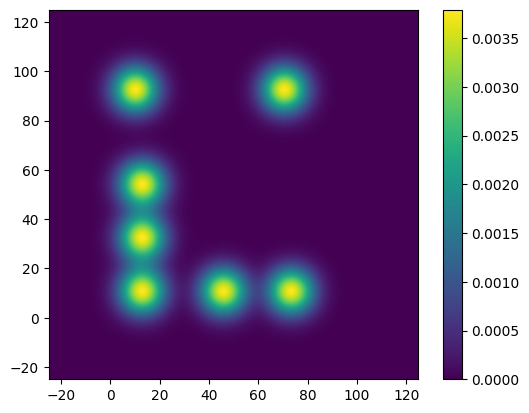

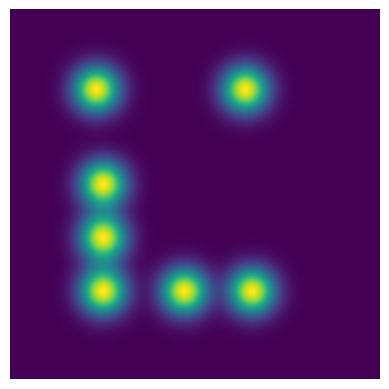

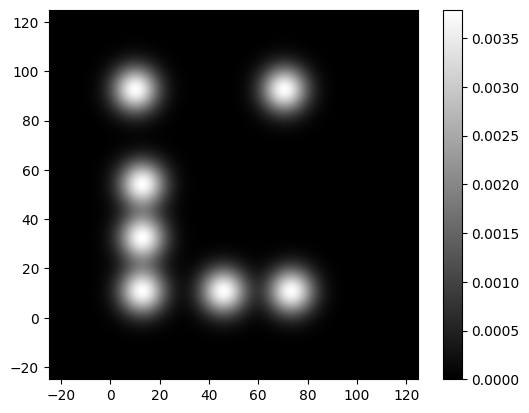

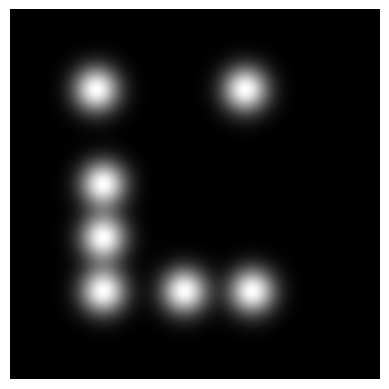

In [44]:
# Generate a grid of x, y points
x = np.linspace(-25, 125, 500)
y = np.linspace(-25, 125, 500)
X, Y = np.meshgrid(x, y)

# Initialize a zero matrix for the density
density = np.zeros(X.shape)

# Add a Gaussian distribution for each point
for point in xynm:
    rv = multivariate_normal(point, [[40, 0], [0, 40]])
    density += rv.pdf(np.dstack((X, Y)))

# Apply a Gaussian filter to smooth the density map
density = gaussian_filter(density, sigma=5)


# Plotting the density map
plt.imshow(density, extent=(X.min(), X.max(), Y.min(), Y.max()), origin='lower')
plt.colorbar()
plt.show()

#saving the plot as image without the bar or the numbers with black background 
plt.imshow(density, extent=(X.min(), X.max(), Y.min(), Y.max()), origin='lower')
plt.axis('off')
plt.savefig('density.png', bbox_inches='tight', pad_inches=0, facecolor='black')
plt.show()

# Plotting the density map in grayscale
plt.imshow(density, extent=(X.min(), X.max(), Y.min(), Y.max()), origin='lower', cmap='gray')
plt.colorbar()
plt.show()

# Saving the plot as image without the bar or the numbers with black background 
plt.imshow(density, extent=(X.min(), X.max(), Y.min(), Y.max()), origin='lower', cmap='gray')
plt.axis('off')
plt.savefig('density.png', bbox_inches='tight', pad_inches=0, facecolor='black')
plt.show()
